In [1]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

# Continue with distributions

Let's remind ourselves of the mean and standard deviation as distribution parameters (population).

$<x>=\sum_i p_ix_i$


$\sigma_x^2=<(x-<x>)^2>$

or

$\sigma_x=\sqrt{<(x-<x>)^2>}$

Other parameters of the distribution:

$\bf{Coefficient\ of\ variance}$, a measure of relative error:

$CV=\frac{\sigma_x}{<x>}$

The Coefficent of variance gives us a way to decide how to report a result for the mean. 
If we caluclate mean of 10, what does that mean? 10.0, 10.00, or just 10? If the result is 11, should we round up to 10? 



## Entropy

The concept comes from Physics originally, formulated in statistical sense in Information theory.

The Entropy is a measure of disorder. Entropy of a gas vs. entropy of a crystal.

Definitions:


Discrete case:

$S=-\sum_i p_iln(p_i)$

Continuous:

$S=-\int_{-\infty}^{+\infty} \rho_x(x)ln(\rho_x(x))dx$

In general:

$S=-<ln(\rho_x)>$

Examples at the extremes:


Uniform distribution (extreme "randomness"):

x|0|1|2|3|4|
-|-|-|-|-|-|
p|1/5|1/5|1/5|1/5|1/5|

$S=-\sum_{i=0}{5}\frac{1}{5}ln(\frac{1}{5})=-5\frac{1}{5}ln(\frac{1}{5})=-ln(\frac{1}{5}=ln(5)$

Completely deterministic case (no "randomness" at all):

x|0|1|2|3|4|
-|-|-|-|-|-|
p|0|0|0|1|0|

$S=-1ln(1)=-ln(1)=0$


Entropy is maximal for uniform distribution, and minimal $S=0$ for a deterministic one.

We can also say, if the system can be found only in a single state, the Entropy is zero.

## 2nd law of Thermodynamics: 

The entropy of an isolated system tends towards its maximum over time. 

or

The state of equilibrium of an isolated system is the state with maximum entropy. (Not necessarily $S=ln(N)$ where $N$ is the number of states. That's true only for the uniform distribution).

## Entropy as a measure of diversity

Let's look at few cases with a mix of species (or any category, type).

In [2]:
#Population 10 species of bacteria, each with the same relative frequency

N=10
p=1/N
rfreqs=p*np.ones(N)
rfreqs

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [3]:
S=0.0
for i in range(N):
    S+=-rfreqs[i]*np.log(rfreqs[i])
    
S

2.3025850929940455

In [4]:
#Population 10 species of bacteria, one dominating the population with 0.91 relative frequency

N=10
rfreqs=(0.1/(N-1))*np.ones(N)
rfreqs[3]=0.9
rfreqs

array([0.011, 0.011, 0.011, 0.9  , 0.011, 0.011, 0.011, 0.011, 0.011,
       0.011])

In [5]:
np.sum(rfreqs)

0.9999999999999999

In [36]:
S=0.0
for i in range(N):
    S+=-rfreqs[i]*np.log(rfreqs[i])
    
S

0.5448054311250702

In [30]:
#Try the same with 1000 species, very diverse first

N=1000
p=1/N
rfreqs=p*np.ones(N)
rfreqs

S=0.0
for i in range(N):
    S+=-rfreqs[i]*np.log(rfreqs[i])
    
S

6.907755278982255

In [39]:
#One species dominating 
N=1000
rfreqs=(0.1/(N-1))*np.ones(N)
rfreqs[3]=0.9
print("Sum of relative frequesncies =",np.sum(rfreqs))


S=0.0
for i in range(N):
    S+=-rfreqs[i]*np.log(rfreqs[i])
    
print("Entropy =", S)

Sum of relative frequesncies = 0.9999999999999999
Entropy = 1.0157584512563183


## Concept of Effective number of species

$N_{eff}=e^S$

Example, uniform distrobution ($N$ is the actuall number of species):


$p_i=1/N$

$S=ln(N)$

$N_{eff}=e^S=e^{ln(N)}=N$

So in a case of extreme diversity, $N_{eff}=N$. 

$ $

$ $
Case of one species dominating:

$\begin{equation}
  p_{i} =
    \begin{cases}
      0 & \text{if $i\neq a$}\\
      1 & \text{if $i=a$}\\
    \end{cases}       
\end{equation}$

$S=\sum_i p_i\ln(p_i)=p_a\ln(p_a)=1ln(1)=0$

$N_{eff}=e^S=e^0=1$

So in a case of extreme non-diversity, $N_{eff}=N$ too, $N=1$ in this case. 


In [41]:
#Let's repeat N=1000, but one dominating, p(3)=0.9
N=1000
rfreqs=(0.1/(N-1))*np.ones(N)
rfreqs[3]=0.9
print("Sum of relative frequesncies =",np.sum(rfreqs))


S=0.0
for i in range(N):
    S+=-rfreqs[i]*np.log(rfreqs[i])
    
print("Entropy =", S)

#Effective number of species

N_eff=np.exp(S)
print("N effective =", N_eff)

Sum of relative frequesncies = 0.9999999999999999
Entropy = 1.0157584512563183
N effective = 2.761457033871912


## Simpson's index

Another way to define effective number of species

$N_{eff}=\frac{1}{\sum_i p_i^2}$

Case of single species:

$p_a=1$

$N_{eff}=\frac{1}{p_a^2}=1$

$ $

$ $
Case of uniform distribution:

$p_i=1/N$

$N_{eff}=\frac{1}{N\sum_ip_i^2}=\frac{1}{N\sum_i\frac{1}{N^2}}=\frac{1}{\sum_i\frac{1}{N}}=\frac{1}{\frac{N}{N}}=1$

## Discrete and Continuous distributions of two (or more) random variables

Simlest example of a distribution of two random variables:

Tossing two coins:
    
-|H|T|
-|-|-|
H|P(HH)|P(HT)|
T|P(TH)|P(TT)|

The new random variable:

X|HH|HT|TH|TT
-|-|-|-|-|
P(X)|1/4|1/4|1/4|1/4|


## Two continuous variables

Example of a distribution of two continuous random variables:

X - uniform on the interval [-1,1]

Y - unifrom on the intherval [-1,1]

Distribution of all paris $(x,y)$. 


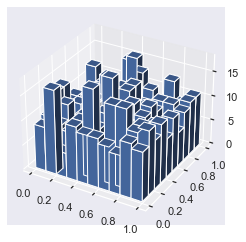

In [38]:
#Let's create independent pairs first
x=stats.uniform.rvs(size=1000)
y=stats.uniform.rvs(size=1000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.1 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

C:\Users\ilija\AppData\Local\Temp\ipykernel_7212\2737991133.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(x,y)
C:\Users\ilija\AppData\Local\Temp\ipykernel_7212\2737991133.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


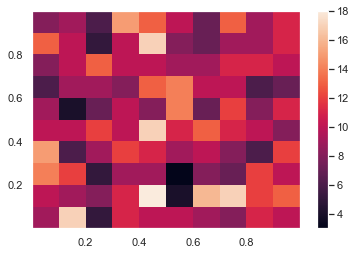

In [41]:
#Another way of plotting, as a heatmap
plt.hist2d(x,y)
plt.colorbar()

## Nonindependent variables example

$x\in[0,1]$

$y\in[0,1]$

but with an additional condition:

$x^2+y^2\leq1.0$

What is this equation?

Let's plot it.

First, note that for each x, there are two y that satify it, y and -y, such that:

$y=\pm\sqrt{1-x^2}$

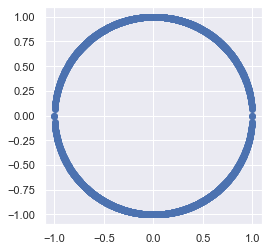

In [139]:
x1=np.linspace(-1.0,1.0,1000)
y1=np.linspace(-1.0,1.0,1000)
y2=np.linspace(-1.0,1.0,1000)
for i in range(1000):
    y1[i]=np.sqrt(1.0-x[i]**2)
    y2[i]=-y1[i]
    
x=np.append(x1,x1)
y=np.append(y1,y2)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y)
ax.set_aspect('equal')# 'equal': same as aspect=1, i.e. same scaling for x and y.


If we sample in a circle, the two variables are not independent.

## Continuous p.d.f

Continuous case:

The probability density function of two variables, $\rho_{x,y}(x,y)$:

$P(X\in[a,b],Y\in[c,d])=\int_a^b\int_c^d \rho_{X,Y}(x,y)dx dy$

## Independence

Discrete case:

$P(A and B)=P(A)P(B)$

Independence in continuous case:

$\rho_{X,Y}(x,y)=\rho_X(x)\rho_Y(y)$

In general this is not true. We can calculate the marginal distribution, by integrating over one of the variables:

$\rho_X(x)=\int_{\infty}^{\infty} \rho_{X,Y}(x,y)dy$


We can measure how independent or not two variables are by calculating the $\bf{Mutual\ information}$:


$I(X,Y)=\int_a^b\int_c^d \rho_{X,Y}(x,y)\ln{\frac{\rho_{X,Y}(x,y)}{\rho_{X}(x)\rho_{Y}(y)}}dx dy$


If $\rho_{X,Y}(x,y)=\rho_{X}(x)\rho_{Y}(y)$ 

then $\ln{\frac{\rho_{X,Y}(x,y)}{\rho_{X}(x)\rho_{Y}(y)}}=\ln(1)=0$

so $I(X,Y)=0$.

## Correlations

In general different than dependence.


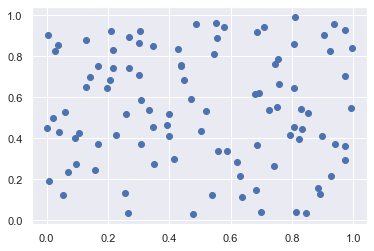

In [151]:
# Example of non-correlated variables
x=np.random.rand(100)
y=np.random.rand(100)

plt.scatter(x,y)

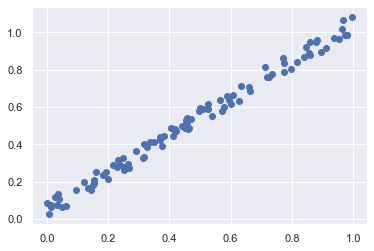

In [150]:
#Let's make some correlated data
x=np.random.rand(100)
y=0.1*np.random.rand(100)

z=x+y
plt.scatter(x,z)

Obviously there is some linear relation bewteen the two variables Z and X in the second case. 
None in the fist case.

A measure of correlation between two random variables is the $\bf{Covariance}$:

$Cov(x,y)=<(x-<x>)(y-<y>)>$

This is similar to the variance formula, but for two variables.

In more detail if $X=[x_1, x_2, x_3,...,x_N]$ and $Y=[y_1, y_2, y_3,...,y_N]$ are two vectors of N samples of two random variables, then the covariance is calculated with:

First calculate 

$<x>=\frac{\Sigma_{i=1}^{N}x_i}{N}$

and 

$<y>=\frac{\Sigma_{i=1}^{N}y_i}{N}$


$Cov(X,Y)=\frac{\Sigma_{i=1}^{N}(x_i-<x>)(y_i-<y>)}{N}$

$\bf{Covariance\ matrix}$

If we have two vectors of random numbers X,Y and stack them in a matrix M, then the covariance matrix $\Sigma$ is:

$\Sigma=\frac{1}{N}(M-<M>)(M-<M>)^T$

NumPy function cov(M) calculates $\Sigma$ for the data matrix M.

For example, many samples of expression of two genes. The expressions in the samples for each gene will be a row in the matrix M.

$X=[x_1, x_2, x_3,...,x_N]$ 

$Y=[y_1, y_2, y_3,...,y_N]$

$<X>=\Sigma x_i/N$

$<Y>=\Sigma y_i/N$

$M=\begin{bmatrix}
X\\
Y
\end{bmatrix}
$

$M=\begin{bmatrix}
x_1, x_2, x_3,...,x_N\\
y_1, y_2, y_3,...,y_N
\end{bmatrix}$

$<M>=\begin{bmatrix}
\Sigma x_i/N\\
\Sigma y_i/N
\end{bmatrix}=\begin{bmatrix}
<X>\\
<Y>
\end{bmatrix}$

$M^T=\begin{bmatrix}
x_1, y_1\\
x_2, y_2\\
.\\
.\\
.\\
x_N,y_N
\end{bmatrix}$



$(M-<M>)(M-<M>)^T=\begin{bmatrix}
x_1-<x>, x_2-<x>,...,x_N-<x>\\
y_1-<y>, y_2-<y>,...,y_N-<y>
\end{bmatrix}\begin{bmatrix}
x_1-<x>, y_1-<y>\\
x_2-<x>, y_2-<y>\\
.\\
.\\
.\\
x_N-<x>,y_N-<y>
\end{bmatrix}$


$(M-<M>)(M-<M>)^T=\begin{bmatrix}
\Sigma_i (x_i-<x>)(x_i-<x>),  \Sigma_i (x_i-<x>)(y_i-<y>)\\
\Sigma_i (y_i-<y>)(x_i-<x>),  \Sigma_i (y_i-<y>)(y_i-<y>)
\end{bmatrix}$

So the covariance matrix (defined earlies as $\Sigma=\frac{1}{N}(M-<M>)(M-<M>)^T$) is:

$\Sigma=\begin{bmatrix}
Var(X) & Cov(X,Y)\\
Cov(Y,X) & Var(Y)
\end{bmatrix}$

The covariance matrix is:
[[0.085 0.001]
 [0.001 0.088]]


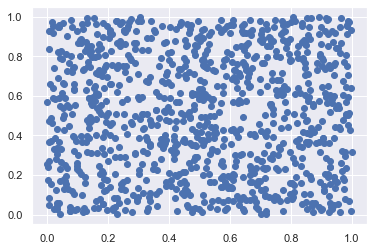

In [201]:
# Let's look at the non-correlated data first

x=np.random.rand(1000)
y=np.random.rand(1000)

plt.scatter(x,y)

#We need to stack the variables
m=np.stack((x,y),axis=0)

cov=np.cov(m)
print("The covariance matrix is:")
print(cov)

In [22]:
arrays = [np.random.randn(3, 4) for _ in range(10)]
arrays
np.stack(arrays,axis=0).shape
#np.stack(arrays, axis=1).shape

(10, 3, 4)

The covariance matrix is:
[[0.09  0.089]
 [0.089 0.088]]


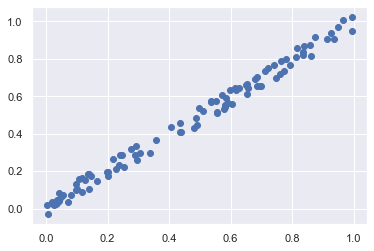

In [210]:
#Let's do the correlated variables case now:
x=np.random.rand(100)
y=0.1*(np.random.rand(100)-0.5)

#x = np.array([[0, 2], [1, 1], [2, 0]]).T
z=x+y
plt.scatter(x,z)


#We need to stack the variables
m=np.stack((x,z),axis=0)

cov=np.cov(m)
print("The covariance matrix is:")
print(cov)

Out of the covariance, we can calculate what is the correlation among the two variables:

$\bf{Pearson's\ correlation\ coefficient}$ is calculated as:

$r=\frac{Cov(X,Y)}{\sigma_X\sigma_Y}$

or

$r=\frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$

It is 1 for perfectly linearly correlated variables.
It is -1 for perectly anti-correlated variables.

The correlation coefficient matrix is:
[[1.    0.996]
 [0.996 1.   ]]


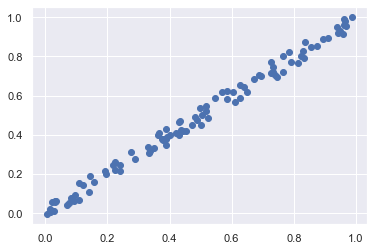

In [215]:
#In NumPy the correlation coeff is calculates with:


x=np.random.rand(100)
y=0.1*(np.random.rand(100)-0.5)

#x = np.array([[0, 2], [1, 1], [2, 0]]).T
z=x+y
plt.scatter(x,z)


#We need to stack the variables
m=np.stack((x,z),axis=0)

print("The correlation coefficient matrix is:")
print(np.corrcoef(m))

The correlation coefficient matrix is:
[[ 1.    -0.122]
 [-0.122  1.   ]]


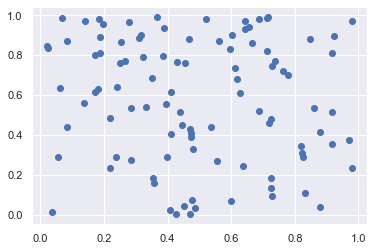

In [219]:
#Let's try non-correlated data
x=np.random.rand(100)
y=np.random.rand(100)

#x = np.array([[0, 2], [1, 1], [2, 0]]).T

plt.scatter(x,y)


#We need to stack the variables
m=np.stack((x,y),axis=0)

print("The correlation coefficient matrix is:")
print(np.corrcoef(m))

The correlation coefficient matrix is:
[[ 1.    -0.994]
 [-0.994  1.   ]]


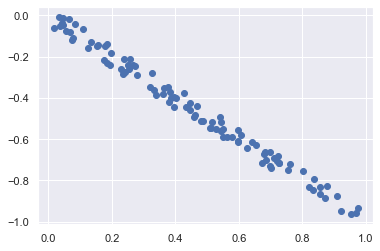

In [220]:
#Anti-correlated variables

x=np.random.rand(100)
y=0.1*(np.random.rand(100)-0.5)

#x = np.array([[0, 2], [1, 1], [2, 0]]).T
z=-x+y
plt.scatter(x,z)


#We need to stack the variables
m=np.stack((x,z),axis=0)

print("The correlation coefficient matrix is:")
print(np.corrcoef(m))



## Independence and correlations

If two variables are independent, they are not correlated. 

But, if two variables are correlated, they are not necessarily dependent. 

Correlation is not the same as causation.



The correlation coefficient matrix is:
[[1.    0.027]
 [0.027 1.   ]]


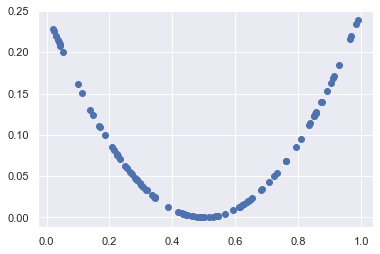

In [223]:
#Example of dependent, non-correlated variables

x=np.random.rand(100)
y=(x-0.5)**2

#x = np.array([[0, 2], [1, 1], [2, 0]]).T
plt.scatter(x,y)


#We need to stack the variables
m=np.stack((x,y),axis=0)

print("The correlation coefficient matrix is:")
print(np.corrcoef(m))


Some useful relations:

If X and Y are independent:

$<XY>=<X><Y>$

For any, independent or not:

$<X+Y>=<X>+<Y>$

For variances, in general:

$Var(X+Y)=Var(X)+Var(Y)+2Cov(X,Y)$

If independent:

$Var(X+Y)=Var(X)+Var(Y)$


Let's derive these together:

$Cov(X,Y)=<xy>-<x><y>$

And the $Var(X+Y)$ from above:


# Sampling

The goal of sampling is to do statistics. This means, to estimate the population parameters from 
a randomly sampled subgroup from the population. 

Let's start with an example:

## Estimate the number of cells in a well-mixed bacterial culture. 
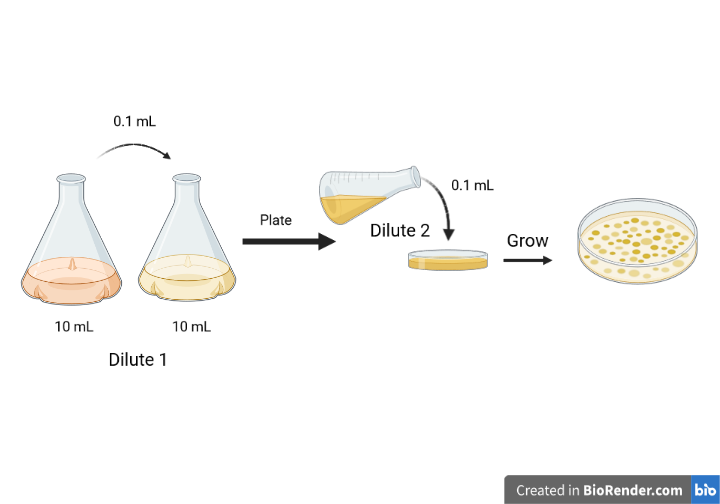

The questions we are trying to answer with Statistics:

    1. How many trials should one do?
    2. How do we report the results?
    3. How confident are we about the results?

## Another example: Population study

Find out how many in a population have a disease, and how mwany are healthy.

Let's say we have a population of 10,000 people, and we sample 100. 

Let the result be 63 healthy, 37 with disease. How do we report the results? Can we say 63% in the population are healthy and 37% have the disease?

The type of questions we ask in Statistics, for example, how many individuals should we sample to get an error of 1%.

What does it mean having an error of 1%?

Coefficient of variance for example is one way to quantify the error of sampling. 
